# Trabajo Practico 6:


In [37]:
import xml.etree.ElementTree as ET
import nltk
from nltk.collocations import *
import os
import math
import itertools
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from gensim import corpora, models, similarities
from nltk.corpus import brown
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic
from nltk.corpus.reader.wordnet import WordNetError

In [2]:
tree = ET.parse('ap.xml')
root = tree.getroot()

corpusDic = {}
totalString = ""
for doc in root:
    docno, text = doc
    docnum = (docno.text).replace(" ", "")
    corpusDic[docnum] = text.text
    
    textWithAddedSpace = text.text + " "
    totalString += textWithAddedSpace

## 1.1) Levantar el corpus AP, separando cada noticia como un elemento distinto
en un diccionario (<DOCNO> : <TEXT>).

In [3]:
vocabulario = {}
stringsNoDeseados = [',', '.', "''", "'", "!",';',':', '``', "__", '@', '|', '...', '(', ')', '{', '}']
for key in corpusDic.keys():
    tokens = nltk.word_tokenize(corpusDic[key])
    
    for word in tokens:
        if word not in stringsNoDeseados:
            if word in vocabulario:
                vocabulario[word] += 1
            else:
                vocabulario[word] = 1
                

In [4]:
vtokens = nltk.word_tokenize(totalString)
for i in range(10):
    print(vtokens[i])

A
16-year-old
student
at
a
private
Baptist
school
who
allegedly


## 1.2) Calcular el tamaño del vocabulario. 

In [5]:
print("tamaño del vocabulario: ", len(vocabulario.keys()))

tamaño del vocabulario:  47452


## 1.3) Para las 500 palabras con más apariciones, calcular el par más asociado según la medida presentada.

In [6]:
mostRepeated500 = [word for word in sorted(vocabulario, key=vocabulario.get, reverse=True)][0:501]

In [7]:
bigram_measures_class = nltk.collocations.BigramAssocMeasures

#esto hace los bigramas de todas las palabras en el texto
finder = nltk.collocations.BigramCollocationFinder.from_words(vtokens,window_size=5)


In [8]:
#para mi esto esta mal xq te hace los bigramas entre las palabras de mosrRepeated500.

scores = {}
for word_1, word_2 in itertools.combinations(mostRepeated500, 2):
    score = finder.score_ngram(bigram_measures_class.pmi, word_1, word_2) 
    # FALTA HACER EL APPEND!! EL IF ES EL PROBLEMA!!
    scores[(word_1, word_2)] = score if score is not None else float('-inf')

aux = sorted(scores, key=scores.get, reverse=True)
[(au, scores[au]) for au in aux[:10]]

[(('South', 'Africa'), 8.652361975378483),
 (('interest', 'rates'), 8.532893251786337),
 (('news', 'conference'), 8.244661043385566),
 (('New', 'York'), 8.062812652158431),
 (('United', 'States'), 8.06188036051849),
 (('West', 'German'), 7.983531966464916),
 (('East', 'Germany'), 7.762227820171429),
 (('West', 'Germany'), 7.738697068761287),
 (('Soviet', 'Union'), 7.614216942440752),
 (('told', 'reporters'), 7.557934639238603)]

## 2.1) Procesar el texto, tokenizando eliminando signos de puntuación.


In [9]:
texto = open("Darwin.txt","r").read()
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = nltk.word_tokenize(texto)
stopset = set(stopwords.words('english'))
stopset.remove('for')
tokens = [w.lower() for w in tokens if (not w in stopset and not w in stringsNoDeseados)]

#lematizamos
wnl = WordNetLemmatizer()
lematizados = [wnl.lemmatize(token) for token in tokens]


In [10]:
print('plant' in lematizados, 'for' in lematizados, 'instinct' in lematizados)

True True True


## 2.2) Siguiendo el artı́culo de la sección, calcular la autocorrelación para estimar la distribución de la palabra a lo largo del texto.


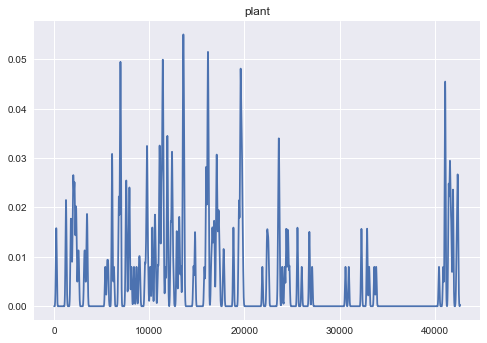

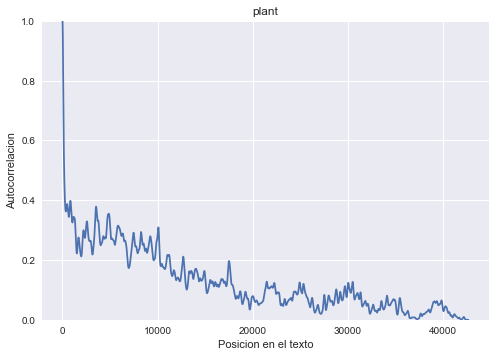

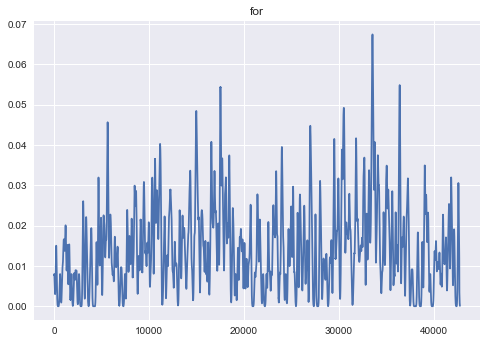

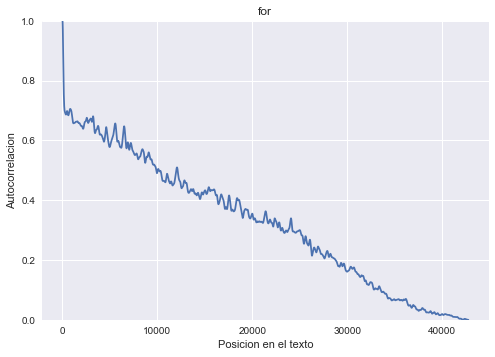

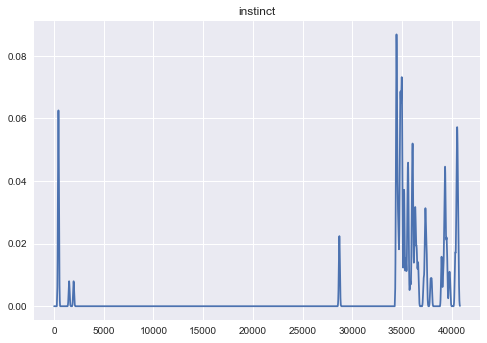

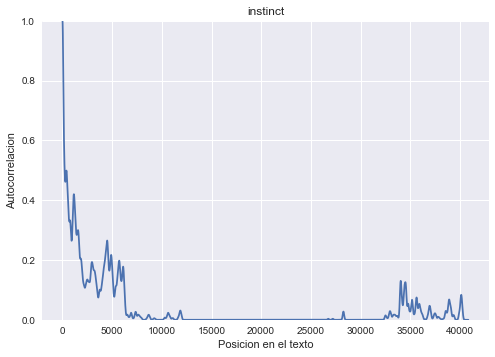

In [11]:
words = ['plant', 'for', 'instinct']
sigma = 50
for word in words:
    rate_word = []
    mascara_palabra = [word == lema for lema in lematizados]
    ultimo = 0
    for j in range(len(mascara_palabra)):
        valores_normales = []
        start = max(0, j - 3*sigma)
        # Calcular todos los valores de la normal es muy lento
        # Así que aprovecho que la dirac es esparsa para calcular solo los que necesito
        for x in range(start, min(len(mascara_palabra) - 1, j+3*sigma)):
            if (x + start >= len(mascara_palabra)): break
            norm = 0
            if mascara_palabra[x]:
                norm = sp.stats.norm.pdf(j, loc = x, scale = 50)
            valores_normales.append(norm)
        suma_normales = sum(valores_normales)
        if suma_normales != 0:
            ultimo = j
        rate_word.append(suma_normales)
    # Esto me da la autocorrelación desde distancia negativa máxima a positiva máxima
    rate_word_aux = rate_word[:ultimo+1]
    plt.plot(rate_word_aux)
    plt.title(word)
    plt.show()
    y = np.correlate(rate_word_aux, rate_word_aux, "full")
    # Me quedo con las positivas
    y = y[int(len(y)/2):]
    # Normalizo
    y = [yi/y[0] for yi in y]
    plt.plot(range(len(y)), y)
    plt.ylim(0, 1)
    plt.title(word)
    plt.xlabel("Posicion en el texto")
    plt.ylabel("Autocorrelacion")
    plt.show()

## 2.3)

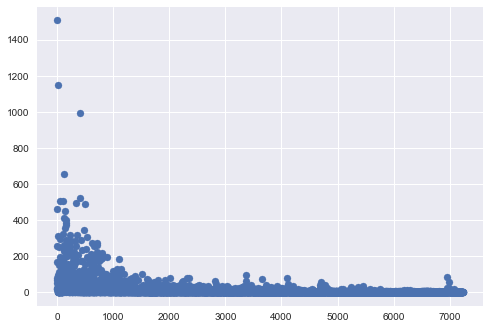

In [12]:
#obtenemos las 100 seleccionadas
vocabularioOrigin = {}
for word in lematizados: 
    if word in vocabularioOrigin:
        vocabularioOrigin[word] += 1
    else:
        vocabularioOrigin[word] = 1

        
sortedOrigin = [word for word in sorted(vocabularioOrigin, key=vocabularioOrigin.get, reverse=False)]
skipValue = len(sortedOrigin) // 500
selected100 = [sortedOrigin[i] for i in range(0,len(sortedOrigin), skipValue)]
    

plt.scatter(range(len([tup[0] for tup in vocabularioOrigin.items()])), [tup[1] for tup in vocabularioOrigin.items()])
plt.show()
#mostRepeated50 = [word for word in sorted(vocabularioOrigin, key=vocabularioOrigin.get, reverse=True)][0:50]
#leastRepeated50 = [word for word in sorted(vocabularioOrigin, key=vocabularioOrigin.get, reverse=False)][0:50]
#selected100 = leastRepeated50 + mostRepeated50

graficamos las palabras por frecuencias y observamos su distribucion, para asegurarnos de que estabamos tomando 100 palabras representativas... we do mah man


/home/javier/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2505: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


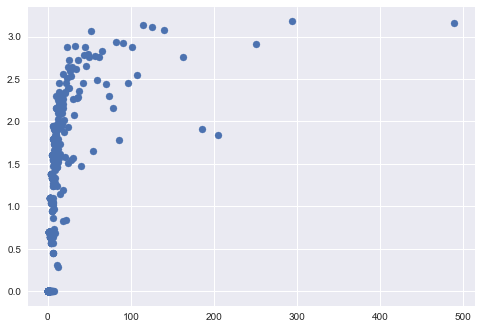

In [13]:
#calculamos entropia
def entropia(word, text):
    p = 3000
    division = len(text) // p
    partitions = [text[p*i : p*(i+1)] for i in range(division-1)]
    
    probs = []
    for partition in partitions:
        aparicionesWord = sum([word == w for w in partition])
        prob = aparicionesWord / len(partition)
        probs.append(prob)
    return sp.stats.entropy(probs)

entropySelected100 = []
for word in selected100:
    entropySelected100.append(entropia(word, lematizados))

plt.scatter([vocabularioOrigin[key] for key in selected100], entropySelected100)
plt.show()

## 2.4)

/home/javier/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2505: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


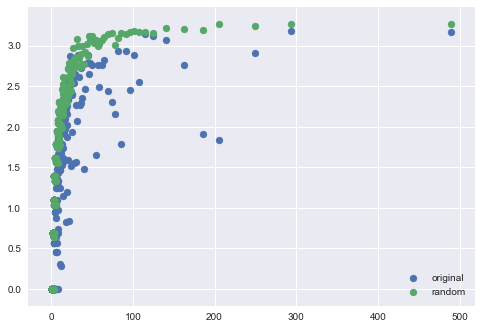

In [14]:
tokensRandom = list(lematizados)
shuffle(tokensRandom)
entropySelectedRandom100 = []
for word in selected100:
    entropySelectedRandom100.append(entropia(word, tokensRandom))

plt.scatter([vocabularioOrigin[key] for key in selected100], entropySelected100, label = 'original')
plt.scatter([vocabularioOrigin[key] for key in selected100], entropySelectedRandom100, label = 'random')
plt.legend()
plt.show()

pusimos 500 por que mira que cheto.


3.1)Utilizando el test WordSim353 1 , comparar el rendimiento entre LSA[3] y
Word2Vec 2 [4].

In [15]:
#reescribo el texto
word_sim_file = open('wordsim353/wordsim353_agreed.txt', 'r')
word_sim = [x.strip().split('\t')[1:] for x in word_sim_file if x[0] !='#']

In [16]:
diccionario = corpora.Dictionary(brown.sents())
corpora.MmCorpus.serialize('corpus.mm', (diccionario.doc2bow(text) for text in brown.sents()))
corpus = corpora.MmCorpus('corpus.mm')

lsi = models.LsiModel(corpus, id2word=diccionario)

word_vec = models.Word2Vec(brown.sents())



In [58]:
brown_ic = wn.ic(brown, False, 0.0)
similitud_lsa = []
similitud_w2v = []
similitud_hum = []
similitud_lch = []
similitud_wup = []
similitud_path = []
similitud_res = []
similitud_jcn= []
similitud_lin = []

for trupla in word_sim:
    if trupla[0] in word_vec.wv.vocab and trupla[1] in word_vec.wv.vocab:
        
        word_net1 = wn.synsets(trupla[0])[0]
        word_net2 = wn.synsets(trupla[1])[0]

        
        try:
            #distintas longitudes no good
            
        
        
            word1 = [x[1] for x in lsi[diccionario.doc2bow([trupla[0]])]]
            word2 = [x[1] for x in lsi[diccionario.doc2bow([trupla[1]])]]

            dist_coseno = sp.spatial.distance.cosine(word1, word2)


            
            
            lch = word_net1.lch_similarity(word_net2)
            wup = word_net1.wup_similarity(word_net2)
            path = word_net1.path_similarity(word_net2)
            res = word_net1.res_similarity(word_net2, brown_ic)
            jcn = word_net1.jcn_similarity(word_net2, brown_ic)
            lin = word_net1.lin_similarity(word_net2, brown_ic)
            

            
            similitud_lch.append(lch)
            similitud_wup.append(wup) 
            similitud_path.append(path)
            similitud_res.append(res)
            similitud_jcn.append(jcn)
            similitud_lin.append(lin)
            
            similitud_hum.append(float(trupla[2]))
            similitud_lsa.append(dist_coseno)
            similitud_w2v.append((word_vec.wv.similarity(trupla[0],trupla[1])))

        
        except WordNetError:
            continue

In [52]:
def normalizar(lista):
    minim=min(lista)
    maxim= max(lista)
    return [(x-minim)/(maxim-minim) for x in lista]
    

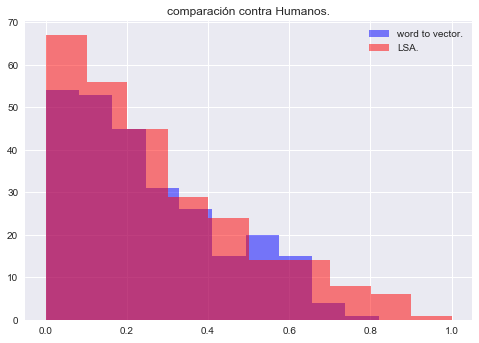

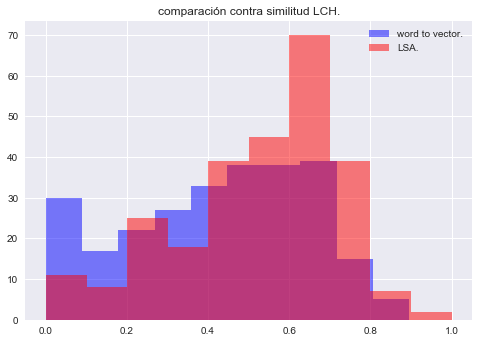

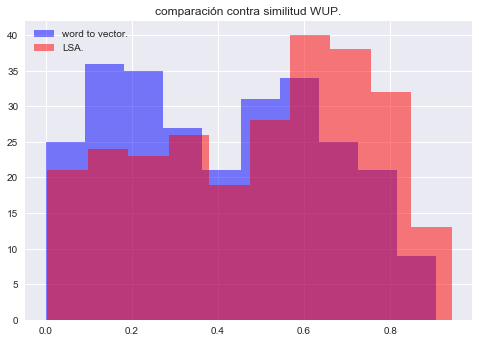

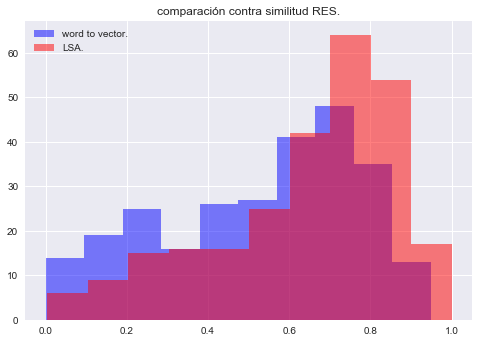

[0.5117851597991484, 0.3267260090407626, 0.0, 0.71163443760881318, 0.68081598898557982, 0.7907228713284491, 0.74263849178203944, 0.93898191765022188, 0.87613979966320432, 0.80199201732639158, 0.9488569742891777, 0.7752621345070746, 0.68539820173459698, 0.82679675188442547, 0.58438583707429925, 0.75713889038612403, 0.81778151471418814, 0.85344224300452032, 0.66274609593940503, 0.28622256513228067, 0.78104812767946596, 0.77550454164789839, 0.32910101588418572, 0.62022244267397064, 0.19929759363864125, 0.92437294028319639, 0.40233857982377974, 0.81240823958442998, 0.72204284537779595, 0.70809441710136611, 0.69001149132169726, 0.86577275734521419, 0.90475632552227703, 0.53969779171622734, 0.28832382384827626, 0.82367465504636894, 0.80736024684314445, 0.91644610358465217, 0.8615334843703768, 0.69090005002609101, 0.86682515579770081, 0.5658087431255826, 0.78750333298273778, 0.55492836234609455, 0.55789328159571805, 0.71159430303697657, 0.65738495035008737, 0.84178750511549572, 0.349177679854

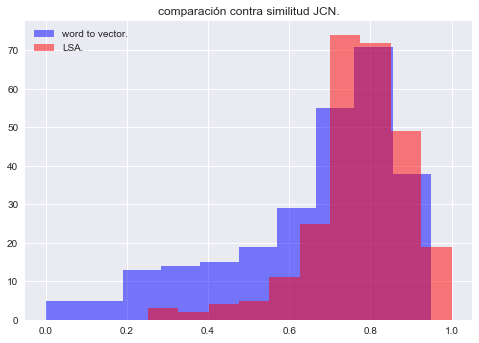

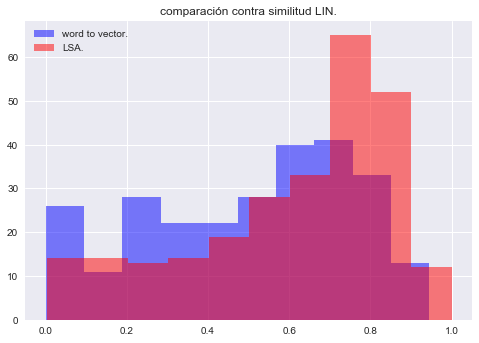

In [59]:
#normalizamos        
from sklearn.preprocessing import normalize
similitud_hum = normalizar(similitud_hum)
similitud_lsa = normalizar(similitud_lsa)
similitud_lch = normalizar(similitud_lch)
similitud_wup = normalizar(similitud_wup)
similitud_res = normalizar(similitud_res)

similitud_jcn = normalizar(similitud_jcn)
similitud_w2v = normalizar(similitud_w2v)
similitud_path = normalizar(similitud_path)
similitud_lin = normalizar(similitud_lin)
          
dist_lsa_hum = []
dist_w2v_hum = []
dist_lsa_lch = []
dist_w2v_lch = []
dist_lsa_wup = []
dist_w2v_wup = []
dist_lsa_path = []
dist_w2v_path = []
dist_lsa_res = []
dist_w2v_res = []
dist_lsa_jcn = []
dist_w2v_jcn = []
dist_lsa_lin = []
dist_w2v_lin = []


for i in range(len(similitud_hum)):
    dist_lsa_hum.append(abs(similitud_lsa[i] - similitud_hum[i]))
    dist_w2v_hum.append(abs(similitud_w2v[i] - similitud_hum[i])) 
        
    dist_lsa_lch.append(abs(similitud_lsa[i] - similitud_lch[i]))
    dist_w2v_lch.append(abs(similitud_w2v[i] - similitud_lch[i]))
    
    dist_lsa_wup.append(abs(similitud_lsa[i] - similitud_wup[i]))
    dist_w2v_wup.append(abs(similitud_w2v[i] - similitud_wup[i]))
    
    dist_lsa_path.append(abs(similitud_lsa[i] - similitud_path[i]))
    dist_w2v_path.append(abs(similitud_w2v[i] - similitud_path[i]))
        
    dist_lsa_res.append(abs(similitud_lsa[i] - similitud_res[i]))
    dist_w2v_res.append(abs(similitud_w2v[i] - similitud_res[i]))
        
    dist_lsa_jcn.append(abs(similitud_lsa[i] - similitud_jcn[i]))
    dist_w2v_jcn.append(abs(similitud_w2v[i] - similitud_jcn[i]))
    
    dist_lsa_lin.append(abs(similitud_lsa[i] - similitud_lin[i]))
    dist_w2v_lin.append(abs(similitud_w2v[i] - similitud_lin[i]))
    


plt.hist(dist_w2v_hum, color = 'b', alpha = 0.5, label = 'word to vector.')
plt.hist(dist_lsa_hum, color = 'r', alpha = 0.5, label = 'LSA.')
plt.legend()
plt.title('comparación contra Humanos.')
plt.show()

plt.hist(dist_w2v_lch, color = 'b', alpha = 0.5, label = 'word to vector.')
plt.hist(dist_lsa_lch, color = 'r', alpha = 0.5, label = 'LSA.')
plt.legend()
plt.title('comparación contra similitud LCH.')
plt.show()

plt.hist(dist_w2v_wup, color = 'b', alpha = 0.5, label = 'word to vector.')
plt.hist(dist_lsa_wup, color = 'r', alpha = 0.5, label = 'LSA.')
plt.legend()
plt.title('comparación contra similitud WUP.')
plt.show()

plt.hist(dist_w2v_res, color = 'b', alpha = 0.5, label = 'word to vector.')
plt.hist(dist_lsa_res, color = 'r', alpha = 0.5, label = 'LSA.')
plt.legend()
plt.title('comparación contra similitud RES.')
plt.show()

print(dist_w2v_jcn)

plt.hist(dist_w2v_jcn, color = 'b', alpha = 0.5, label = 'word to vector.')
plt.hist(dist_lsa_jcn, color = 'r', alpha = 0.5, label = 'LSA.')
plt.legend()
plt.title('comparación contra similitud JCN.')
plt.show()

plt.hist(dist_w2v_lin, color = 'b', alpha = 0.5, label = 'word to vector.')
plt.hist(dist_lsa_lin, color = 'r', alpha = 0.5, label = 'LSA.')
plt.legend()
plt.title('comparación contra similitud LIN.')
plt.show()

Leacock & Chodorow: encuentra el camino más corto entre dos conceptos y escala ese valor por el maximo largo del camino en la jerarquia is-a en la cual ocurre.


In [44]:
print(dist_lsa_path)
print(len(dist_w2v_path))


[array([  4.22351802e-02,   3.78613404e-02,   3.21637922e-01,
         4.28241809e-02,   3.00430801e-02,   1.89421076e-02,
         4.30923156e-02,   5.73457271e-02,   1.26538099e-02,
         3.36820672e-02,   1.55072273e-02,   5.42608812e-03,
         1.19107479e-02,   1.29683071e-02,   4.10156842e-02,
         4.61139014e-02,   3.95368923e-02,   3.30413002e-03,
         5.49208283e-02,   3.48016450e-02,   3.94890261e-02,
         3.53929079e-02,   3.40192298e-02,   2.28104407e-02,
         3.82807765e-02,   2.04422009e-02,   1.42415098e-02,
         3.20708339e-02,   4.29195602e-05,   2.82610128e-02,
         3.60374892e-02,   7.32523418e-03,   7.45274778e-03,
         2.98737710e-02,   3.17742425e-02,   1.90977486e-02,
         2.91322295e-02,   3.01353216e-02,   4.91026115e-02,
         2.76603401e-02,   3.41438527e-02,   4.82015080e-02,
         4.89515454e-02,   3.95698644e-02,   2.33407012e-02,
         4.50697835e-02,   2.62820532e-01,   2.14726813e-02,
         4.58337765e-02

Wu  & Palmer: encuentra el largo del camino hacia el nodo raiz desde el least common subsumer (LCS) de los dos conceptos, el cual es el concepro mas especifico que comparten como ancestro. Este calor se escala por la suma de los largos de los caminos desde los conceptos individuales hasta la raiz.


In [20]:
ls = [1,2,3]
max(ls)

3

path: es igual al inverso del largo del camino más corto entre los dos conceptos.


http://www.d.umn.edu/~tpederse/Pubs/AAAI04PedersenT.pdf